In [2]:
!pip install nltk -q
!pip install textblob -q
!pip install wordcloud -q
!pip install transformers datasets -q
!pip uninstall -y tensorflow tensorflow-text tf-keras tensorflow-decision-forests
!pip install tensorflow==2.15.0 tensorflow-text==2.15.0 tf-keras==2.15.1 tensorflow-decision-forests==1.8.1
!pip install transformers -q
!pip install pyarrow
!pip install torch

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.
Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflow-text 2.16.1
Uninstalling tensorflow-text-2.16.1:
  Successfully uninstalled tensorflow-text-2.16.1
Found existing installation: tf_keras 2.16.0
Uninstalling tf_keras-2.16.0:
  Successfully uninstalled tf_keras-2.16.0
Found existing installation: tensorflow_decision_forests 1.9.1
Uninstalling tensorflow_decision_forests-1.9.1:
  Successfully uninstalled tensorflow_decision_forests-1.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 65.7 MB/s eta 0:00:00:00:0100:01
   

In [3]:
import numpy as np
import pandas as pd
import tarfile
import os
import matplotlib.pyplot as plt
import string
import nltk
import re
import seaborn as sns
import tensorflow as tf
import transformers
import torch



from datasets import load_dataset
from warnings import filterwarnings
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import classification_report,accuracy_score,precision_recall_fscore_support
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from textblob import Word, TextBlob
from wordcloud import WordCloud
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder



2024-08-24 16:52:01.933378: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-24 16:52:01.933455: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-24 16:52:01.935734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
train = pd.read_csv("/kaggle/input/amazon-reviews/train.csv")
test = pd.read_csv("/kaggle/input/amazon-reviews/test.csv")

In [6]:
train

,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [7]:
test

,2,Great CD,"My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing ""Who was that singing ?"""
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [8]:
train.columns = ["polarity","title","text"]
test.columns = ["polarity","title","text"]

In [9]:
train

,polarity,title,text
0,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
1,2,Amazing!,This soundtrack is my favorite music of all ti...
2,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
3,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
4,2,an absolute masterpiece,I am quite sure any of you actually taking the...
...,...,...,...
3599994,1,Don't do it!!,The high chair looks great when it first comes...
3599995,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599996,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599997,1,what is it saying?,not sure what this book is supposed to be. It ...


In [10]:
test

,polarity,title,text
0,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
1,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
2,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
3,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
4,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
...,...,...,...
399994,1,Unbelievable- In a Bad Way,We bought this Thomas for our son who is a hug...
399995,1,"Almost Great, Until it Broke...",My son recieved this as a birthday gift 2 mont...
399996,1,Disappointed !!!,"I bought this toy for my son who loves the ""Th..."
399997,2,Classic Jessica Mitford,This is a compilation of a wide range of Mitfo...


In [11]:
print(train.shape)
print(test.shape)

(3599999, 3)
(399999, 3)


In [ ]:
print("train:")
print(train.isnull().sum())
print("test:")
print(test.isnull().sum())

train:

polarity      0

title       207

text          0

dtype: int64

test:

polarity     0

title       24

text         0

dtype: int64


In [12]:
train['title']=train['title'].fillna('no title')
test['title']=test['title'].fillna('no title')


In [13]:
print("train:")
print(train.isnull().sum())
print("test:")
print(test.isnull().sum())

train:
polarity    0
title       0
text        0
dtype: int64
test:
polarity    0
title       0
text        0
dtype: int64


In [14]:
train = train.dropna(subset=['polarity'])
test = test.dropna(subset=['polarity'])

In [15]:
train.columns

Index(['polarity', 'title', 'text'], dtype='object')

In [16]:
for col in ['title', 'text']:
    train[col] = train[col].str.lower()

for col in ['title', 'text']:
    test[col] = test[col].str.lower()

In [17]:
# Function to sample an equal number of rows for each polarity

def sample_equal_polarity(df, num_samples):
    unique_polarities = df['polarity'].unique()
    sampled_dfs = []

    for polarity in unique_polarities:
        polarity_df = df[df['polarity'] == polarity]
        if len(polarity_df) > num_samples:
            sampled_dfs.append(polarity_df.sample(num_samples, random_state=1))
        else:
            sampled_dfs.append(polarity_df)

    sampled_df = pd.concat(sampled_dfs)
    return sampled_df

num_samples_per_polarity = 50000

train = sample_equal_polarity(train, num_samples_per_polarity)
test = sample_equal_polarity(test, num_samples_per_polarity)

print("Train sample polarity distribution:\n", train['polarity'].value_counts())
print("Test sample polarity distribution:\n", test['polarity'].value_counts())

Train sample polarity distribution:
 polarity
2    50000
1    50000
Name: count, dtype: int64
Test sample polarity distribution:
 polarity
2    50000
1    50000
Name: count, dtype: int64


CLEANING THE DATA

In [18]:
def clean_data(text):
    # remove special characters
    text = text.translate(str.maketrans("", "", string.punctuation))
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    # escaped quotes and new lines
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    text = text.replace('\n', ' ').replace('\r', ' ')
    # strip leading and trailing spaces
    text = text.strip()
    return text



for col in ['title', 'text']:
    train[col] = train[col].apply(clean_data)

for col in ['title', 'text']:
    test[col] = test[col].apply(clean_data)

In [19]:
train

,polarity,title,text
113684,2,chopat knee strap,the chopat knee strap does what it claims to d...
2162445,2,keyboards are a hit,purchased 2 keyboards for grand daughters for ...
3462086,2,works great,i was given a dvd player that was not compatib...
452360,2,always ivan lins,im from rio de janeiro brasil and i think that...
2530821,2,extraordinarily good value,this is a very nice mans watch particularly at...
...,...,...,...
1660472,1,not reliable,this 8gb kingston datatraveler has proven to b...
2719811,1,second install makes no difference crashes han...,i bought emc9 quite a while ago on an offer 30...
3336308,1,dilgers writing is dull forced,dilgers story is lost in this poorly organized...
433508,1,piece of trash,i was forced to listen to this at my cousins h...


In [20]:
test

,polarity,title,text
319421,2,revisionist history,i loved reading mcculloughs biography of john ...
142131,2,cute catchy and great for tiring out energetic...,i checked this video out of the library for my...
146583,2,a fun christmas movie,the story told here is much like the story fro...
129510,2,love this utensil holder,this awesome utensil holder not only matches m...
329269,2,a whole lotta huh,this book is unique in that it is the first bo...
...,...,...,...
133190,1,it aint a celestial pictures release,this dvd like so many others related to the sh...
397626,1,half complete product,it is insane what they are asking you to do th...
181349,1,careful dts does not play on standard cd players,this is in dts format it wont play on my compu...
225363,1,get a cisco press help,you sure need ccda exam certification guide or...


# STEMMING AND LEMMATIZATION

# Stemming :-

converts words to root form

example : run running runner runs ------> runn

# Lemmatization:-

converts words to root form taking part of speech into consideration

example: better --> good , ran ----> run

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [22]:
def preprocess_text(text, method='lemmatization'):
    if pd.isna(text):
        return ""
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    if method == 'stemming':
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == 'lemmatization':
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_combined(row, method='lemmatization'):
    combined_text = str(row['title']) + ' ' + str(row['text'])
    return preprocess_text(combined_text, method)

train['processed_text'] = train.apply(lambda row: preprocess_combined(row, method='lemmatization'), axis=1)
test['processed_text'] = test.apply(lambda row: preprocess_combined(row, method='lemmatization'), axis=1)

# Vectorization

In [23]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['processed_text'])
X_test = vectorizer.transform(test['processed_text'])

In [24]:
print(X_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3457117 stored elements and shape (100000, 179258)>
  Coords	Values
  (0, 149230)	0.2298661136287622
  (0, 125688)	0.15873428870717263
  (0, 159493)	0.17669222111185454
  (0, 120069)	0.12134978632482986
  (0, 14485)	0.14700764119658993
  (0, 116876)	0.3043418464387311
  (0, 48814)	0.31515282469496764
  (0, 33634)	0.160571158731681
  (0, 151311)	0.35294189772363566
  (0, 88445)	0.4000699561891821
  (0, 32879)	0.5933426705907524
  (1, 72877)	0.18566025845979428
  (1, 168468)	0.2091273850922926
  (1, 69057)	0.09958192738347106
  (1, 94422)	0.17583615398957844
  (1, 87756)	0.18141846783437093
  (1, 8709)	0.23595400733061303
  (1, 107516)	0.13874338410325737
  (1, 127379)	0.46632877380722276
  (1, 15017)	0.20722462981500464
  (1, 33072)	0.20364876192206136
  (1, 42536)	0.19604830943595758
  (1, 69900)	0.2844431809013666
  (1, 126478)	0.16710506286576682
  (1, 76102)	0.2018663808908556
  :	:
  (99998, 158500)	0.10831590950730857
 

In [25]:
train

,polarity,title,text,processed_text
113684,2,chopat knee strap,the chopat knee strap does what it claims to d...,chopat knee strap chopat knee strap claim doho...
2162445,2,keyboards are a hit,purchased 2 keyboards for grand daughters for ...,keyboard hit purchased 2 keyboard grand daught...
3462086,2,works great,i was given a dvd player that was not compatib...,work great given dvd player compatible tv done...
452360,2,always ivan lins,im from rio de janeiro brasil and i think that...,always ivan lin im rio de janeiro brasil think...
2530821,2,extraordinarily good value,this is a very nice mans watch particularly at...,extraordinarily good value nice man watch part...
...,...,...,...,...
1660472,1,not reliable,this 8gb kingston datatraveler has proven to b...,reliable 8gb kingston datatraveler proven comp...
2719811,1,second install makes no difference crashes han...,i bought emc9 quite a while ago on an offer 30...,second install make difference crash hang etc ...
3336308,1,dilgers writing is dull forced,dilgers story is lost in this poorly organized...,dilgers writing dull forced dilgers story lost...
433508,1,piece of trash,i was forced to listen to this at my cousins h...,piece trash forced listen cousin house put bad...


In [26]:
def convert_polarity_to_sentiment(polarity):
    return 'negative' if polarity == 1 else 'positive'


train['sentiment'] = train['polarity'].apply(convert_polarity_to_sentiment)
test['sentiment'] = test['polarity'].apply(convert_polarity_to_sentiment)

In [27]:
y_train = train['sentiment']
y_test = test['sentiment']

Plot distribution of review ratings

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


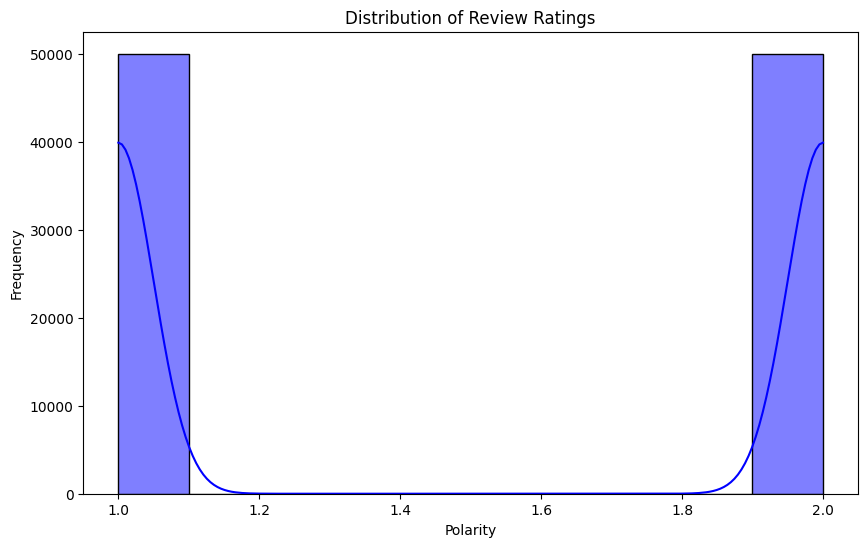

In [28]:

plt.figure(figsize=(10, 6))
sns.histplot(train['polarity'], bins=10, kde=True, color='blue')
plt.title('Distribution of Review Ratings')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

Plot distribution of text length in train dataset

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


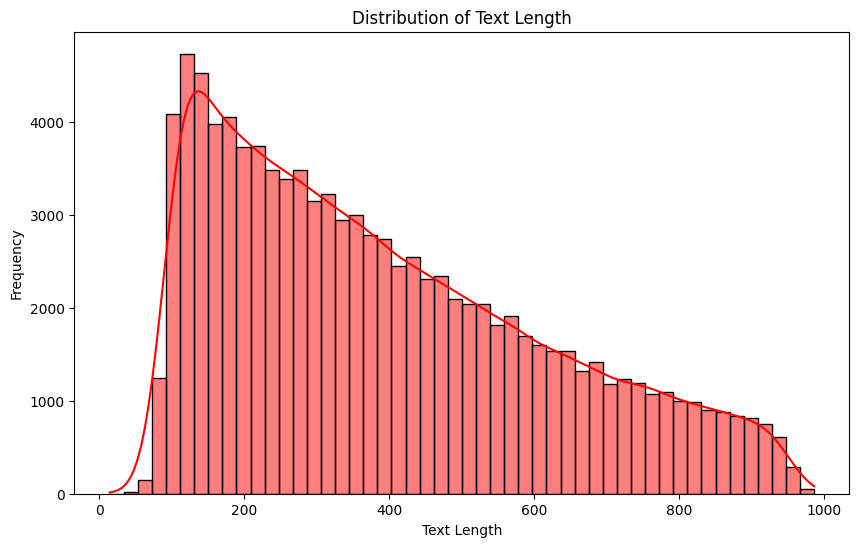

In [29]:
train['text_length'] = train['text'].apply(lambda x: len(str(x)))
test['text_length'] = test['text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.histplot(train['text_length'], bins=50, kde=True, color='red')
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Wordcloud of all review text

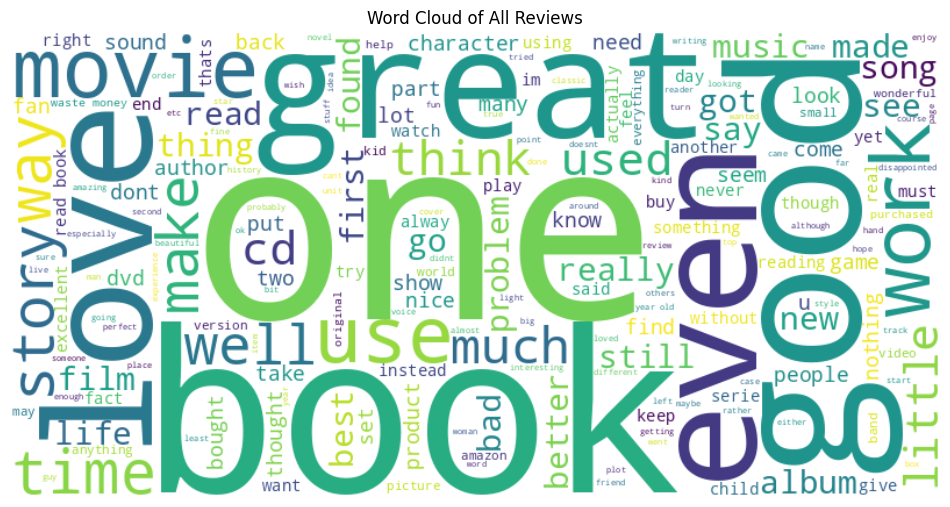

In [30]:
from wordcloud import WordCloud


all_text = ' '.join(train['processed_text'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Reviews')
plt.show()

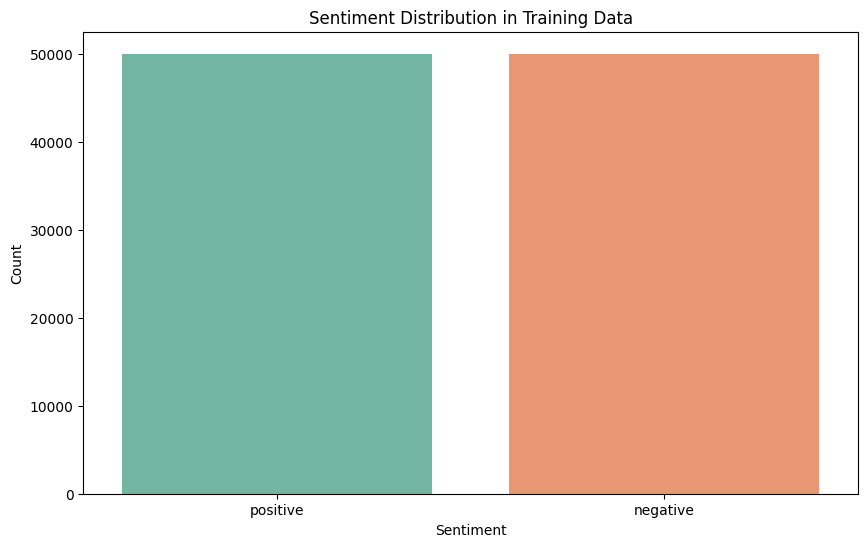

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='sentiment', palette='Set2')
plt.title('Sentiment Distribution in Training Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Logistic Regression

Accuracy Score: 0.88083

Classification Report:
               precision    recall  f1-score   support

    negative       0.88      0.88      0.88     50000
    positive       0.88      0.89      0.88     50000

    accuracy                           0.88    100000
   macro avg       0.88      0.88      0.88    100000
weighted avg       0.88      0.88      0.88    100000

Confusion Matrix:
 [[43811  6189]
 [ 5728 44272]]


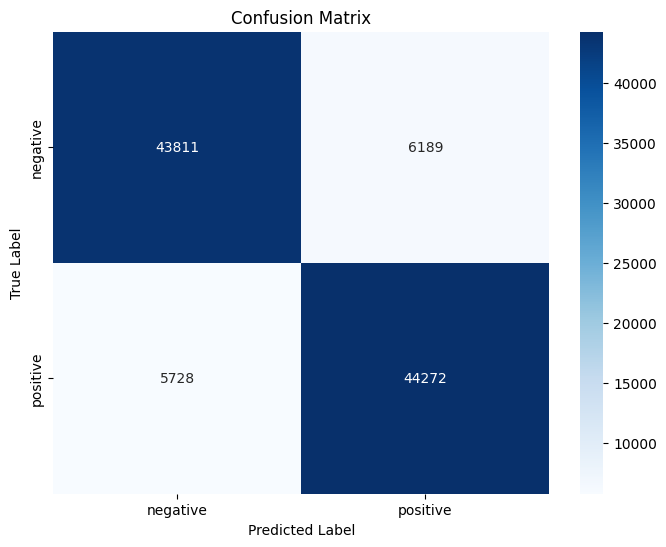

In [84]:
lr=LogisticRegression(max_iter=100000)
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


conf_matrix = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
print("Confusion Matrix:\n", conf_matrix)


# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'positive'], 
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [59]:
import pickle

# Load the LogisticRegression model from the .pkl file
model_save_path = 'logistic_regression_model.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(lr, file)


In [97]:
#Example of predicting new data
new_texts = ["I love this product!", "This is the worst purchase I've ever made.","I hate this brand","Would recommend to a friend"]
new_texts_processed = [preprocess_text(text, method='lemmatization') for text in new_texts]

X_new = vectorizer.transform(new_texts_processed)

predictions = lr.predict(X_new)
print("Predictions:", predictions)

Predictions: ['positive' 'negative' 'negative' 'positive']


# Naive Bayes

Multinomial Naive Bayes

Accuracy Score: 0.83531

Classification Report:
               precision    recall  f1-score   support

    negative       0.82      0.86      0.84     50000
    positive       0.85      0.81      0.83     50000

    accuracy                           0.84    100000
   macro avg       0.84      0.84      0.84    100000
weighted avg       0.84      0.84      0.84    100000

Confusion Matrix:
 [[43049  6951]
 [ 9518 40482]]


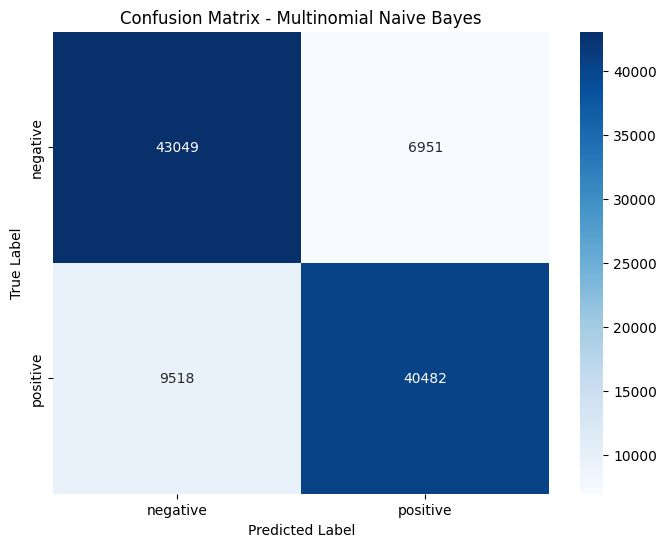

In [79]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'positive'], 
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()

In [56]:
import pickle

# Save the MultinomialNB model as a .pkl file
model_save_path = '/kaggle/working/multinomial_nb_model.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(nb, file)



In [40]:
#Example of predicting new data
new_texts = [
    "The service was excellent and the staff were very friendly.",
    "I received a defective item and customer support was unhelpful.",
    "I would not recommend this to anyone. It was a complete waste of money.",
    "Very happy with this product. Would love to see more like this"
]
new_texts_processed = [preprocess_text(text, method='lemmatization') for text in new_texts]

X_new = vectorizer.transform(new_texts_processed)

predictions = nb.predict(X_new)
print("Predictions:", predictions)

Predictions: ['positive' 'negative' 'negative' 'positive']


Bernaulli Naive Bayes

Accuracy Score: 0.844

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.84      0.84     50000
    positive       0.84      0.85      0.85     50000

    accuracy                           0.84    100000
   macro avg       0.84      0.84      0.84    100000
weighted avg       0.84      0.84      0.84    100000

Confusion Matrix:
 [[41856  8144]
 [ 7456 42544]]


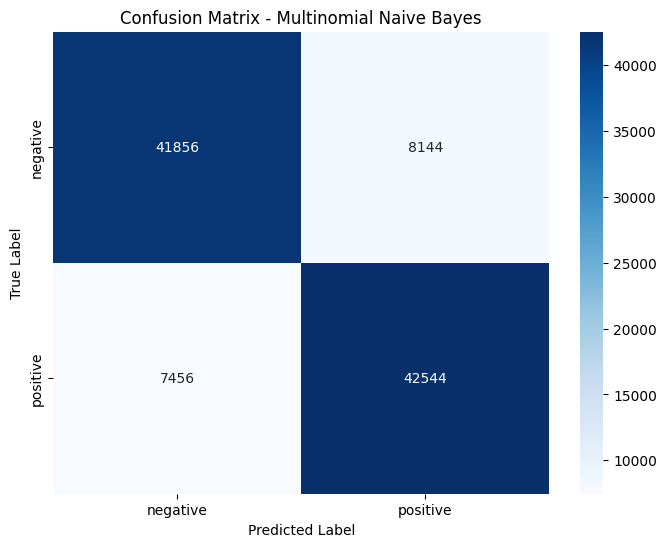

In [82]:
bnb = BernoulliNB()

bnb.fit(X_train, y_train)

y_pred = bnb.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred, labels=['negative', 'positive'])
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['negative', 'positive'], 
            yticklabels=['negative', 'positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()



In [55]:
import pickle

# Save the BernoulliNB model as a .pkl file
model_path = '/kaggle/working/bernoulli_nb_model.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(bnb, file)


# LSTM - Long Short-Term Memory

In [42]:
# tokenization
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train['processed_text'])

# convert text to sequences
# like "I love this product!" will be [1,2,3,4]
# I-1 love-2 this-3 product-4
X_train_seq = tokenizer.texts_to_sequences(train['processed_text'])
X_test_seq = tokenizer.texts_to_sequences(test['processed_text'])

In [43]:
# padding sequences
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [44]:
# convert labels to numeric values in train and test

le = LabelEncoder()
y_train_encoded = le.fit_transform(train['sentiment'])
y_test_encoded = le.transform(test['sentiment'])

In [50]:
sentiment_lstm = Sequential()
sentiment_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
sentiment_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))

sentiment_lstm.add(Dropout(0.5))  # Dropout layer to prevent overfitting (learning from noise too)
sentiment_lstm.add(LSTM(32))
sentiment_lstm.add(Dropout(0.5))  # Additional Dropout layer
sentiment_lstm.add(Dense(1, activation='sigmoid'))

In [52]:
from tensorflow.keras.optimizers import Adam


sentiment_lstm.compile(loss='binary_crossentropy',
                       optimizer=Adam(learning_rate=1e-4),
                       metrics=['accuracy'])


modellstm = sentiment_lstm.fit(X_train_pad, y_train_encoded,
                             epochs=10,
                             batch_size=64,
                             validation_split=0.2,
                             verbose=1)


loss, accuracy = sentiment_lstm.evaluate(X_test_pad, y_test_encoded)
print("Test Accuracy:", accuracy)



Epoch 1/10
1250/1250 [==============================] - 222s 174ms/step - loss: 0.2257 - accuracy: 0.9168 - val_loss: 0.3939 - val_accuracy: 0.8469
Epoch 2/10
1250/1250 [==============================] - 217s 173ms/step - loss: 0.2057 - accuracy: 0.9259 - val_loss: 0.5232 - val_accuracy: 0.8006
Epoch 3/10
1250/1250 [==============================] - 211s 169ms/step - loss: 0.1886 - accuracy: 0.9334 - val_loss: 0.4316 - val_accuracy: 0.8423
Epoch 4/10
1250/1250 [==============================] - 210s 168ms/step - loss: 0.1731 - accuracy: 0.9401 - val_loss: 0.4615 - val_accuracy: 0.8411
Epoch 5/10
1250/1250 [==============================] - 209s 168ms/step - loss: 0.1619 - accuracy: 0.9457 - val_loss: 0.5099 - val_accuracy: 0.8252
Epoch 6/10
1250/1250 [==============================] - 209s 168ms/step - loss: 0.1497 - accuracy: 0.9512 - val_loss: 0.5368 - val_accuracy: 0.8271
Epoch 7/10
1250/1250 [==============================] - 213s 170ms/step - loss: 0.1407 - accuracy: 0.9555 - val_

3125/3125 [==============================] - 108s 35ms/step
Accuracy: 0.85644
Precision: 0.8255516586292562
Recall: 0.90388
F1-score: 0.8629420300924158
Confusion Matrix:
 [[40450  9550]
 [ 4806 45194]]


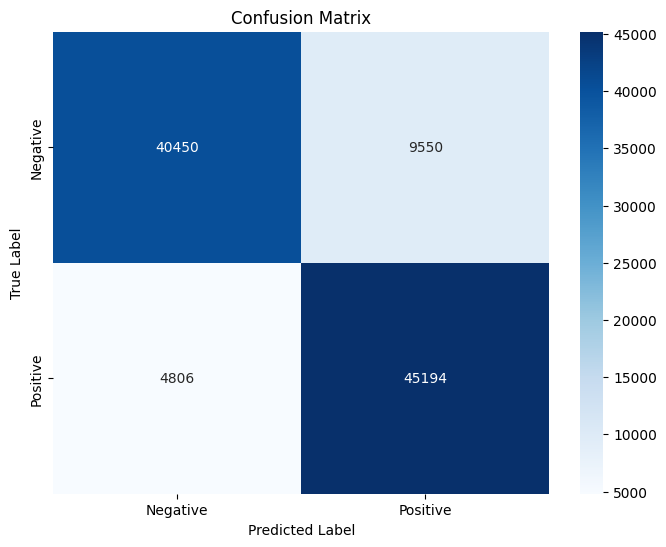

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = sentiment_lstm.predict(X_test_pad)
y_pred_classes = np.round(y_pred).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
precision = precision_score(y_test_encoded, y_pred_classes)
recall = recall_score(y_test_encoded, y_pred_classes)
f1 = f1_score(y_test_encoded, y_pred_classes)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes, labels=[0, 1])

print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [119]:
import pickle

# Save the LSTM model as a .pkl file
model_save_path = '/kaggle/working/sentiment_lstm_model1.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(sentiment_lstm, file)



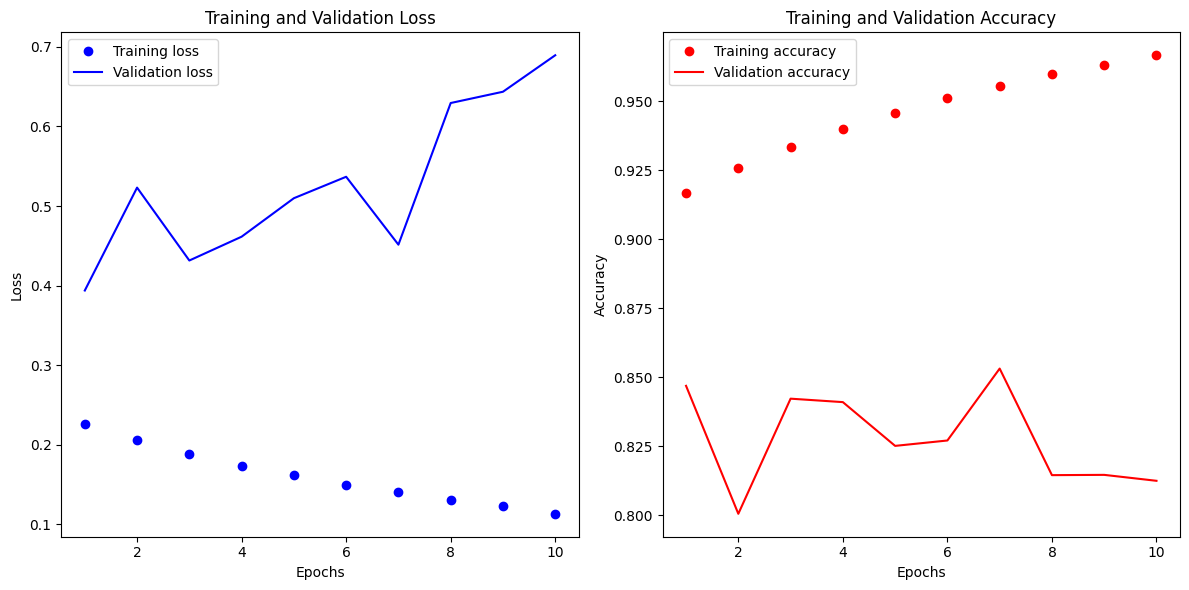

In [85]:
history_dict = modellstm.history

# Extracting loss and accuracy values
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# BERT - Bidirectional Encoder Representations from Transformers

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(list(train['processed_text']), padding='max_length', truncation=True, max_length=256, return_tensors='pt')
test_encodings = tokenizer(list(test['processed_text']), padding='max_length', truncation=True, max_length=256, return_tensors='pt')

train_labels = [label - 1 for label in train['polarity']]
test_labels = [label - 1 for label in test['polarity']]

print(set(train_labels))
print(set(test_labels))


In [ ]:

class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = SentimentDataset(train_encodings, train_labels)
test_dataset = SentimentDataset(test_encodings, test_labels)


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


In [ ]:
import torch
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from torch_xla.core.xla_model import xm  # PyTorch/XLA library for TPUs

# Load the pre-trained BERT model with a classification head
bertmodel = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Define training arguments for TPU
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=200,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch",
    tpu_num_cores=8,  # Enable TPU usage with 8 cores
    fp16=True,  # Mixed precision training for faster computation
    # push_to_hub=False,  # Disable if you're not pushing to the Hugging Face Hub
)

# Initialize the Trainer
trainer = Trainer(
    model=bertmodel,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Train the model on TPU
xm.mark_step()  # Synchronize TPU operations (optional, but sometimes needed)
trainer.train()

# Evaluate the model on TPU
eval_result = trainer.evaluate()

# Print the evaluation results
print(f"Evaluation results: {eval_result}")


In [ ]:
print(f"Accuracy Score: {eval_result['eval_accuracy']:.4f}")
print(f"Precision: {eval_result['eval_precision']:.4f}")
print(f"Recall: {eval_result['eval_recall']:.4f}")
print(f"F1 Score: {eval_result['eval_f1']:.4f}")

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

new_texts = [
    "The service was excellent and the staff were very friendly.",
    "I received a defective item and customer support was unhelpful.",
    "The product exceeded my expectations and was worth every penny.",
    "I would not recommend this to anyone. It was a complete waste of money."
]


new_texts_processed = [preprocess_text(text, method='lemmatization') for text in new_texts]


new_encodings = tokenizer(new_texts_processed, truncation=True, padding=True, max_length=100, return_tensors='pt')


bertmodel.eval()


with torch.no_grad():
    outputs = bertmodel(**new_encodings)
    logits = outputs.logits


predictions = torch.argmax(logits, dim=-1)


label_map = {0: 'negative', 1: 'positive'}
predicted_labels = [label_map[pred.item()] for pred in predictions]

for text, label in zip(new_texts, predicted_labels):
    print(f"Text: {text}\nPredicted Sentiment: {label}\n")


# **Analysis and Comparison**

In [130]:
lstm_metrics = {
    'Model': 'LSTM',
    'Accuracy': 0.85644,
    'Precision': 0.8255516586292562,
    'Recall': 0.90388,
    'F1 Score': 0.8629420300924158
}

# Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
precision_bnb = precision_score(y_test, y_pred_bnb, pos_label='positive')
recall_bnb = recall_score(y_test, y_pred_bnb, pos_label='positive')
f1_bnb = f1_score(y_test, y_pred_bnb, pos_label='positive')

# Multinomial Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label='positive')
recall_nb = recall_score(y_test, y_pred_nb, pos_label='positive')
f1_nb = f1_score(y_test, y_pred_nb, pos_label='positive')

# Logistic Regression
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, pos_label='positive')
recall_lr = recall_score(y_test, y_pred_lr, pos_label='positive')
f1_lr = f1_score(y_test, y_pred_lr, pos_label='positive')

# Create DataFrame with metrics
metrics = {
    'Model': ['LSTM', 'Bernoulli Naive Bayes', 'Multinomial Naive Bayes', 'Logistic Regression'],
    'Accuracy': [lstm_metrics['Accuracy'], accuracy_bnb, accuracy_nb, accuracy_lr],
    'Precision': [lstm_metrics['Precision'], precision_bnb, precision_nb, precision_lr],
    'Recall': [lstm_metrics['Recall'], recall_bnb, recall_nb, recall_lr],
    'F1 Score': [lstm_metrics['F1 Score'], f1_bnb, f1_nb, f1_lr]
}

df_metrics = pd.DataFrame(metrics)

print(df_metrics)


                     Model  Accuracy  Precision   Recall  F1 Score
0                     LSTM   0.85644   0.825552  0.90388  0.862942
1    Bernoulli Naive Bayes   0.84400   0.839331  0.85088  0.845066
2  Multinomial Naive Bayes   0.83531   0.853456  0.80964  0.830971
3      Logistic Regression   0.88083   0.877351  0.88544  0.881377


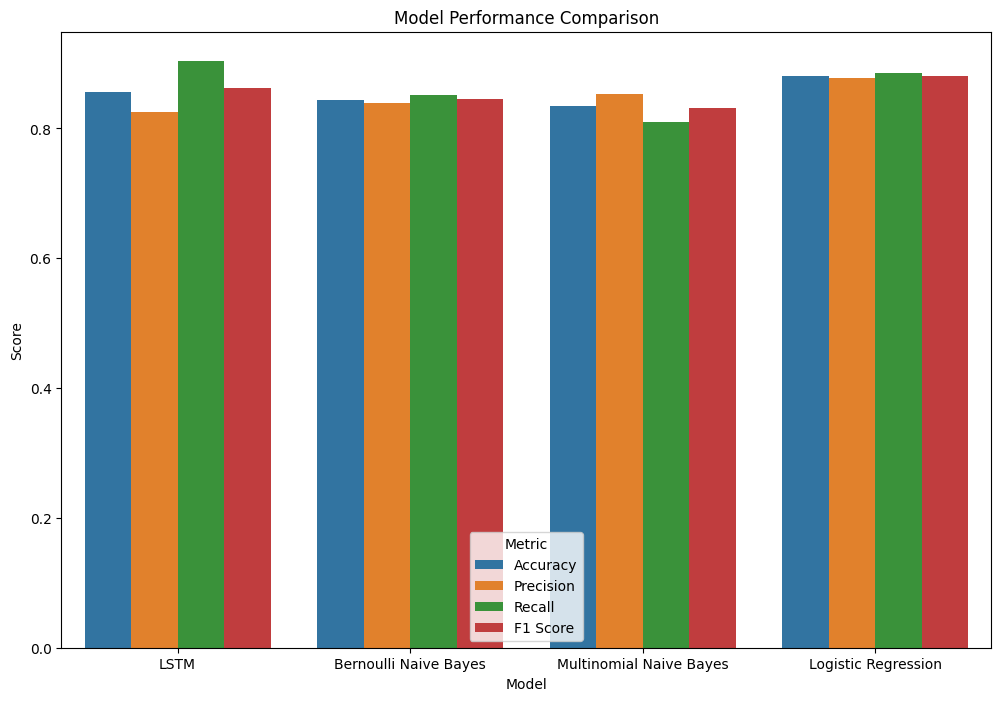

In [131]:
# Melt the DataFrame for easier plotting with seaborn
df_melted = df_metrics.melt(id_vars='Model', 
                            value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'],
                            var_name='Metric', value_name='Value')

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend(title='Metric')
plt.show()


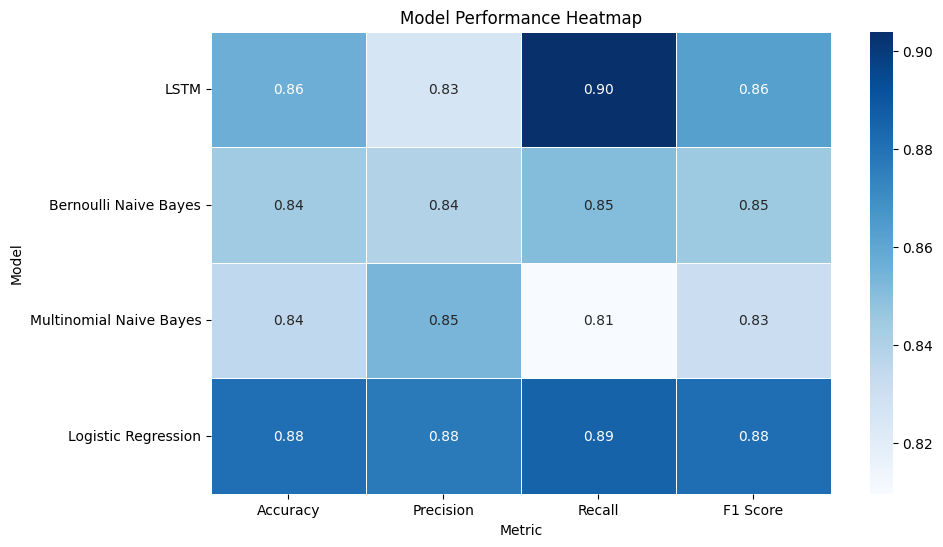

In [132]:
# Set the 'Model' column as the index

df_heatmap = df_metrics.set_index('Model')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Model Performance Heatmap')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()
